In [1]:
#takes summary tab from google sheets and creates visualizations on them..

In [2]:
#import dependencies 
from numpy.random import seed
from numpy.random import randn
from scipy import stats
import numpy as np

import math  

import seaborn as sns
sns.set(style="darkgrid")
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

import pandas as pd
import os

In [3]:
directory = "./data/google_sheets_summary_tabs/"
print(os.listdir(directory))

['.DS_Store', 'Aggregate_Summary_Dedicated_Host_11-16-2019 - mean by tenants.csv', 'z1d', 'c3', 'c4']


In [4]:
#import each summary data
data_name = 'Aggregate_Summary_Dedicated_Host_11-16-2019 - mean by tenants.csv'

#create list of data we need to aggregate... if we are doing so

In [5]:
#add csvs to data frames
df = pd.read_csv(directory + data_name, header = 0)

In [6]:
df.head()

,tenants,sysbench_wallTime,sysbench_std_wallTime,y_cruncher_wallTime,y_cruncher_std_wallTime,pgbench_transactions,pgbench_std_transactions,iperf_bandwidthUpload,iperf_bandwitdhDownload,iperf_total,iperf_stdUp,iperf_stdDown,iperf_stdTotal
0,1,7.173863,0.002781,4.441481,0.039923,179145.3333,520.497198,4970.00,4745.000000,9715.000000,0.000000,321.601893,321.601893
1,2,7.176439,0.004805,4.497907,0.013084,180675.0000,1164.334396,4970.00,4882.000000,9852.000000,0.000000,121.203625,121.203625
2,3,7.568770,0.004481,4.475998,0.050332,172304.2222,185.429822,4970.00,4843.333333,9813.333333,0.000000,307.224503,307.224503
3,4,7.568645,0.003691,4.643859,0.035991,174785.5833,215.980395,4968.50,4849.000000,9817.500000,4.743416,253.151631,253.567952
4,5,7.781149,0.004360,4.621565,0.047322,176469.6000,219.544020,4497.16,3971.280000,8468.440000,432.897239,1016.849987,1148.969173


In [7]:
#function for creating normalized row
def addNormalizedRow(result_df, metric, experimentName):
    #take each row and divide by first row
    #add normalized column
    if experimentName == 'pgbench' or experimentName == 'iperf':
        result_df[metric +'_normalized'] = (result_df.loc[:,metric]).div(result_df.iloc[0][metric])
    elif experimentName == 'reversed':
        result_df[metric +'_normalized'] = (result_df.loc[:,metric]).div(result_df.iloc[-1][metric])
        #result_df[metric +'_normalized']= result_df[metric +'_normalized'].div(result_df.iloc[0][metric +'_normalized'])
    else:
        
#make sure all these numbers r correct...test with spread sheet!!!!!

        result_df[metric +'_normalized'] = 1 - (result_df.loc[:,metric]-result_df.iloc[0][metric]).div(result_df.iloc[0][metric])
    
    result_df[metric +'_normalized'] *= 100
    result_df[metric +'_normalized'] = result_df[metric +'_normalized']

In [8]:
print(str(7.17/9.05) +' sysbench reveresed max difference ')
print(str(4.44/6.51) +' y-cruncher reveresed max difference ')
print(str(123217/179145) +' pgbench max difference ')
print(str(1264/9715) + ' iperf max difference ')
print(str(1- (9.05-7.17)/7.17) +' sysbench max difference ')
print(str(1- 6.51/4.44) +' y-cruncher max difference ')

0.7922651933701657 sysbench reveresed max difference 
0.6820276497695853 y-cruncher reveresed max difference 
0.6878059672332468 pgbench max difference 
0.1301080802882141 iperf max difference 
0.7377963737796372 sysbench max difference 
-0.466216216216216 y-cruncher max difference 


In [9]:
addNormalizedRow(df, 'sysbench_wallTime', 'reversed')
addNormalizedRow(df, 'y_cruncher_wallTime', 'reversed')
addNormalizedRow(df, 'iperf_total', 'iperf')
addNormalizedRow(df, 'pgbench_transactions', 'pgbench')

In [10]:
df.head(1)

,tenants,sysbench_wallTime,sysbench_std_wallTime,y_cruncher_wallTime,y_cruncher_std_wallTime,pgbench_transactions,pgbench_std_transactions,iperf_bandwidthUpload,iperf_bandwitdhDownload,iperf_total,iperf_stdUp,iperf_stdDown,iperf_stdTotal,sysbench_wallTime_normalized,y_cruncher_wallTime_normalized,iperf_total_normalized,pgbench_transactions_normalized
0,1,7.173863,0.002781,4.441481,0.039923,179145.3333,520.497198,4970.0,4745.0,9715.0,0.0,321.601893,321.601893,79.236555,68.125691,100.0,100.0


In [11]:
df.tail(1)

,tenants,sysbench_wallTime,sysbench_std_wallTime,y_cruncher_wallTime,y_cruncher_std_wallTime,pgbench_transactions,pgbench_std_transactions,iperf_bandwidthUpload,iperf_bandwitdhDownload,iperf_total,iperf_stdUp,iperf_stdDown,iperf_stdTotal,sysbench_wallTime_normalized,y_cruncher_wallTime_normalized,iperf_total_normalized,pgbench_transactions_normalized
47,48,9.053729,0.020986,6.519539,0.064182,123217.8333,493.228246,649.322917,614.804167,1264.127083,327.719052,243.571932,526.76876,100.0,100.0,13.012116,68.780934


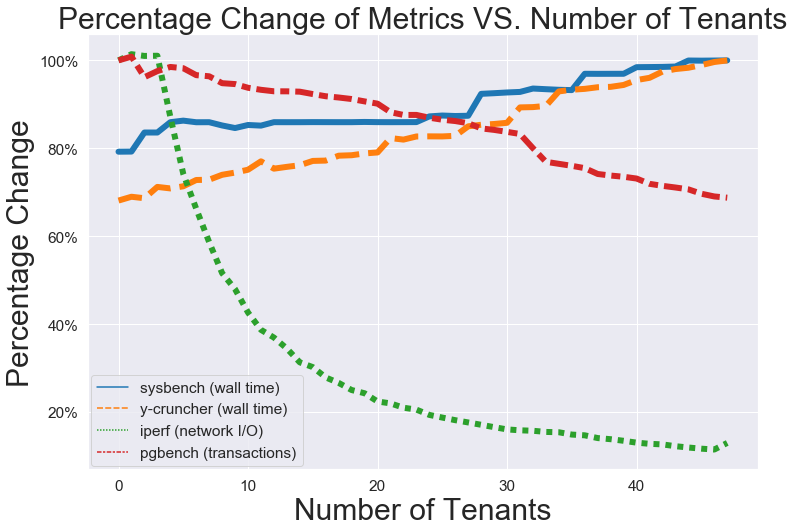

In [12]:
sns.set(font_scale=1.4)

fig, ax = plt.subplots(figsize=(12, 8))
data_plot = df[['sysbench_wallTime_normalized',
                           'y_cruncher_wallTime_normalized',
                           'iperf_total_normalized',
                           'pgbench_transactions_normalized'
                          ]]
data_plot = data_plot.rename(columns= {'sysbench_wallTime_normalized': "sysbench (wall time)", 
                                       'y_cruncher_wallTime_normalized': "y-cruncher (wall time)", 
                                       'pgbench_transactions_normalized': "pgbench (transactions)", 
                                       'iperf_total_normalized':"iperf (network I/O)"
                                      }
                            )
sns.lineplot(data=data_plot, palette="tab10", linewidth=6)
plt.legend(loc='lower left', borderaxespad=0.2)

ax.set_title("Percentage Change of Metrics VS. Number of Tenants", fontsize=30)
ax.set_xlabel("Number of Tenants", fontsize=30)
ax.set_ylabel("Percentage Change", fontsize=30)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

plt.show()

In [13]:
addNormalizedRow(df, 'sysbench_wallTime', 'sysbench')
addNormalizedRow(df, 'y_cruncher_wallTime', 'ycruncher')
addNormalizedRow(df, 'iperf_total', 'iperf')
addNormalizedRow(df, 'pgbench_transactions', 'pgbench')

In [14]:
df.head(1)

,tenants,sysbench_wallTime,sysbench_std_wallTime,y_cruncher_wallTime,y_cruncher_std_wallTime,pgbench_transactions,pgbench_std_transactions,iperf_bandwidthUpload,iperf_bandwitdhDownload,iperf_total,iperf_stdUp,iperf_stdDown,iperf_stdTotal,sysbench_wallTime_normalized,y_cruncher_wallTime_normalized,iperf_total_normalized,pgbench_transactions_normalized
0,1,7.173863,0.002781,4.441481,0.039923,179145.3333,520.497198,4970.0,4745.0,9715.0,0.0,321.601893,321.601893,100.0,100.0,100.0,100.0


In [15]:
df.tail(1)

,tenants,sysbench_wallTime,sysbench_std_wallTime,y_cruncher_wallTime,y_cruncher_std_wallTime,pgbench_transactions,pgbench_std_transactions,iperf_bandwidthUpload,iperf_bandwitdhDownload,iperf_total,iperf_stdUp,iperf_stdDown,iperf_stdTotal,sysbench_wallTime_normalized,y_cruncher_wallTime_normalized,iperf_total_normalized,pgbench_transactions_normalized
47,48,9.053729,0.020986,6.519539,0.064182,123217.8333,493.228246,649.322917,614.804167,1264.127083,327.719052,243.571932,526.76876,73.795624,53.212498,13.012116,68.780934


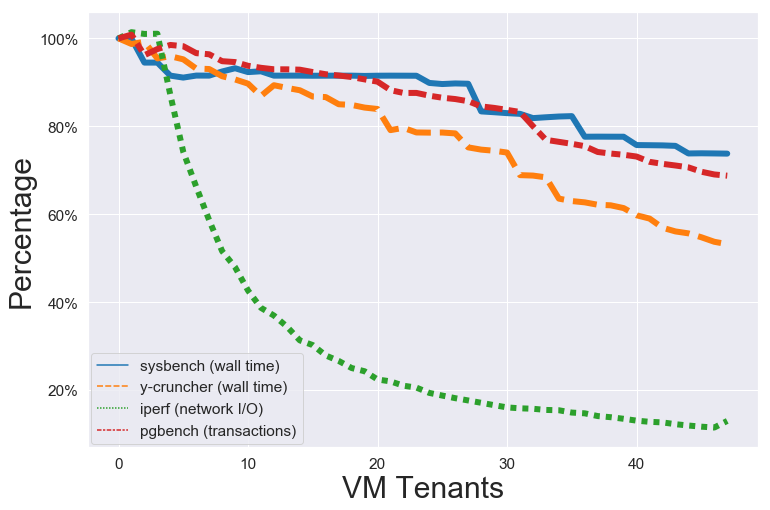

In [16]:
sns.set(font_scale=1.4)

fig, ax = plt.subplots(figsize=(12, 8))
data_plot = df[['sysbench_wallTime_normalized',
                           'y_cruncher_wallTime_normalized',
                           'iperf_total_normalized',
                           'pgbench_transactions_normalized'
                          ]]
data_plot = data_plot.rename(columns= {'sysbench_wallTime_normalized': "sysbench (wall time)", 
                                       'y_cruncher_wallTime_normalized': "y-cruncher (wall time)", 
                                       'pgbench_transactions_normalized': "pgbench (transactions)", 
                                       'iperf_total_normalized':"iperf (network I/O)"
                                      }
                            )
sns.lineplot(data=data_plot, palette="tab10", linewidth=6)
plt.legend(loc='lower left', borderaxespad=0.2)

#ax.set_title("m5d.large", fontsize=30)
ax.set_xlabel("VM Tenants", fontsize=30)
ax.set_ylabel("Percentage", fontsize=30)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

plt.show()

In [17]:
#import c3, c4, z1d 

In [7]:
directory = "./data/google_sheets_summary_tabs/"
print(os.listdir(directory))

['.DS_Store', 'Aggregate_Summary_Dedicated_Host_11-16-2019 - mean by tenants.csv', 'new_graphs - z1d_graph.csv', 'new_graphs - c3_graph.csv', 'new_graphs - c4_graph.csv']


In [134]:
#c3
df_c3 = pd.read_csv(directory + 'new_graphs - c3_graph.csv')
df_c3 = df_c3[['CPU (y-cruncher)','CPU + I/O (pgbench)','Network (iperf)']]

In [135]:
#drop % sign and change type to numeric
def toNumeric(df):
    for column in df:
        df[column] = df[column].astype(str)
        df[column] = df[column].str.rstrip('%')
        df[column] = pd.to_numeric(df[column], errors='coerce')
    df.index = df.index + 1

In [136]:
toNumeric(df_c3)

In [137]:
df_c3.head()

,CPU (y-cruncher),CPU + I/O (pgbench),Network (iperf)
1,100.00,100.00,100.00
2,99.54,99.72,100.03
3,99.11,97.35,100.03
4,98.78,96.57,100.01
5,98.37,91.85,100.00


In [138]:
sns.set(font_scale=1.4)
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter

In [139]:
def showMetricVsTenants(df):  
    fig, ax = plt.subplots(figsize=(12, 8))
    data_plot = df

    sns.lineplot(data=data_plot, palette="tab10", linewidth=6)
    plt.legend(loc='lower left', borderaxespad=0.2)

    ax.set_xlabel("Number of Tenants", fontsize=30)
    ax.set_ylabel("Percentage Change", fontsize=30)
    
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y/100))) 
    
    plt.show()

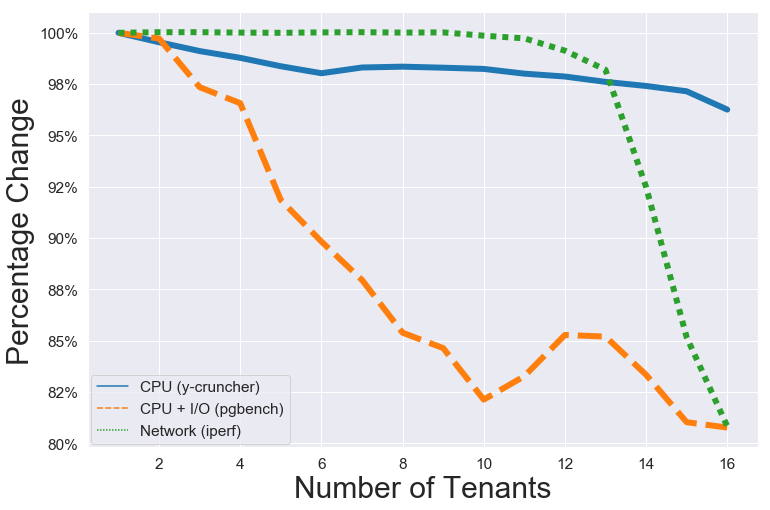

In [140]:
showMetricVsTenants(df_c3)

In [141]:
#c4
df_c4 = pd.read_csv(directory + 'new_graphs - c4_graph.csv')
df_c4 = df_c4[['CPU (y-cruncher)','CPU + I/O (pgbench)','Network (iperf)']]

In [142]:
toNumeric(df_c4)

In [143]:
df_c4

,CPU (y-cruncher),CPU + I/O (pgbench),Network (iperf)
1,100.00,94.07,100.00
2,98.81,100.00,102.33
3,98.71,97.81,101.69
4,98.67,96.82,102.34
5,98.42,95.56,102.01
6,97.92,97.27,97.36
7,98.20,97.29,91.13
8,98.23,96.72,90.17
9,96.91,97.18,88.93
10,93.53,96.10,83.55


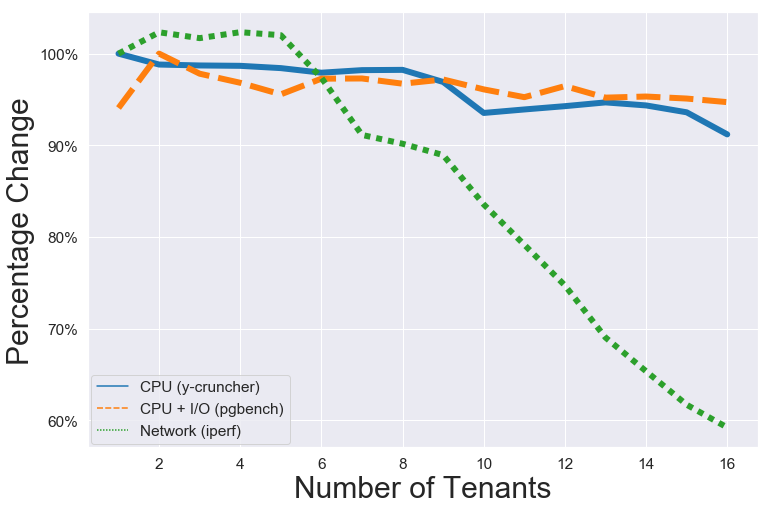

In [144]:
showMetricVsTenants(df_c4)

In [145]:
c4_performance_lost_vs_vm_tenants

NameError: name 'c4_performance_lost_vs_vm_tenants' is not defined

In [146]:
#z1d
df_z1d = pd.read_csv(directory + 'new_graphs - z1d_graph.csv')
df_z1d = df_z1d[['CPU (y-cruncher)','CPU + I/O (pgbench)','Network (iperf)']]

In [147]:
toNumeric(df_z1d)

In [148]:
df_z1d

,CPU (y-cruncher),CPU + I/O (pgbench),Network (iperf)
1,100.00,100.00,100.00
2,99.85,98.99,88.88
3,98.81,98.12,80.55
4,98.01,97.35,67.41
5,97.68,97.41,60.39
6,97.24,98.32,53.61
7,96.80,98.50,46.00
8,96.52,97.66,42.17
9,96.01,97.31,38.34
10,95.42,97.10,35.74


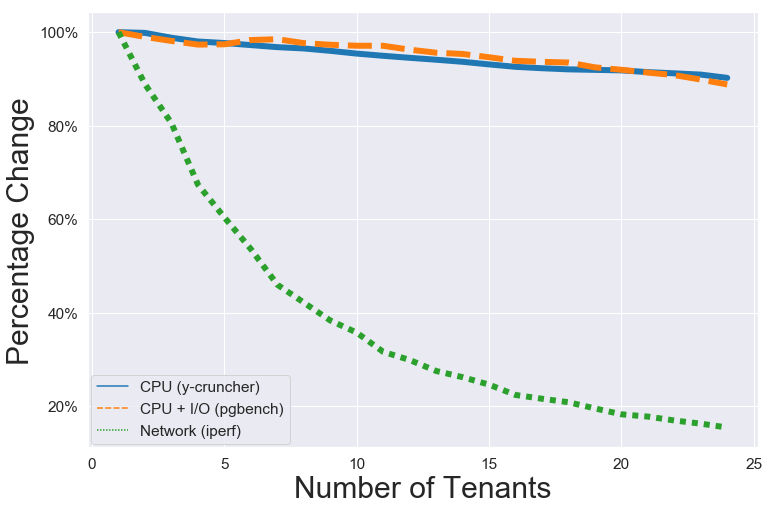

In [149]:
showMetricVsTenants(df_z1d)